In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

C:\Users\aphiw\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Load the data with error handling

In [2]:
try:
    # First try standard CSV with comma delimiter
    df = pd.read_csv('ASSESSMENT_DATA_Portfolio_Analyst.csv')
except pd.errors.ParserError:
    try:
        # If that fails, try semicolon delimiter (common in European data)
        df = pd.read_csv('ASSESSMENT_DATA_Portfolio_Analyst.csv', delimiter=';')
    except pd.errors.ParserError:
        # If both fail, skip bad lines with a warning
        df = pd.read_csv('ASSESSMENT_DATA_Portfolio_Analyst.csv', error_bad_lines=False, warn_bad_lines=True)

# Display_Data

In [3]:
df

,refdate,Asset Name,Weight (%),Active Weight (%),Total Risk,%Contribution to Tracking Error,%Contribution to Total Risk,Beta (Relative to Benchmark),Country,GICS_sector,Price(USD),Market Capitalization (USD),Overall ESG Score,Overall ESG Environmental Score,Overall ESG Social Score,Overall ESG Governance Score
0,2022/11/01,Mexican Peso,"0,00","0,00","12,591382950","0,0000","0,0000","0,361560988",MEX,NaN,1,NaN,NaN,NaN,NaN,NaN
1,2022/11/01,1102592 STATE ST USD LIQ LNAV-PRM AC,"0,01","0,01","0,000000000","0,0000","0,0000",0,USA,NaN,1,0,NaN,NaN,NaN,NaN
2,2022/11/01,South African Rand,"0,00","0,00","15,710361210","0,0000","0,0000","0,435181476",ZAF,NaN,100,NaN,NaN,NaN,NaN,NaN
3,2022/11/02,ANTOFAGASTA PLC,"0,02","0,02","39,970472520","0,0563","0,0253","1,14151901",GBR,Materials,"11,76",13289829347,"8,3","3,6","6,1","7,7"
4,2022/11/02,TAIWAN SEMICONDUCTOR MANUFACT CO LTD,"0,07","0,07","34,137504780","0,1284","0,0727","1,135673466",USA,Information Technology,"60,52","3,14E+11",9,"5,6","7,4","6,7"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14713,2023/12/04,LEENO INDUSTRIAL,"0,02","0,02","45,708831680","0,0396","0,0194","1,192541714",KOR,Information Technology,201,2349385659,0,"2,5","0,7","4,3"
14714,2023/12/04,CAPITEC BANK HOLDINGS LTD,"0,03","0,02","34,742896720","0,0398","0,0257","1,114574037",ZAF,Financials,"1943,16",11980116611,"7,1","5,6","4,5","5,5"
14715,2023/12/04,BANK RAKYAT INDONESIA (PERSERO) TBK PT,"0,03","0,03","36,020912470","0,0376","0,0315","1,039968905",IDN,Financials,5500,53935587514,"6,7","0,2","6,9","3,9"
14716,2023/12/04,SAMSUNG ELECTRONICS CO LTD,"0,08","0,04","33,104891460","0,0614","0,0784","1,13468024",KOR,Information Technology,"72,6","3,32E+11","6,8","7,3","5,6","4,7"


## Clean numeric columns (replace commas with dots for decimals, handle NULLs)

In [4]:
numeric_cols = ['Weight (%)', 'Active Weight (%)', 'Total Risk', 
                '%Contribution to Tracking Error', '%Contribution to Total Risk',
                'Beta (Relative to Benchmark)', 'Price(USD)', 
                'Market Capitalization (USD)', 'Overall ESG Score',
                'Overall ESG Environmental Score', 'Overall ESG Social Score',
                'Overall ESG Governance Score']

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

# Convert date column
df['refdate'] = pd.to_datetime(df['refdate'])

# Filter out cash/currency positions (where sector is NULL)
portfolio_assets = df[df['GICS_sector'].notna()]

# Calculate sector weights - corrected syntax

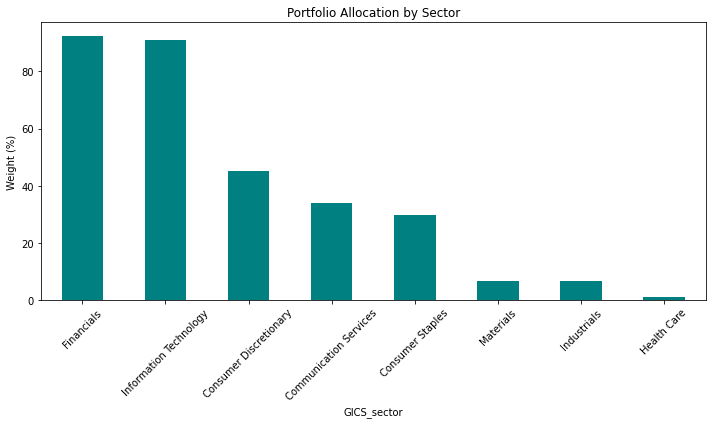

In [5]:
# Calculate sector weights
sector_allocation = portfolio_assets.groupby('GICS_sector')['Weight (%)'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sector_allocation.plot(kind='bar', color='teal')
plt.title('Portfolio Allocation by Sector')
plt.ylabel('Weight (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Geographic Allocation

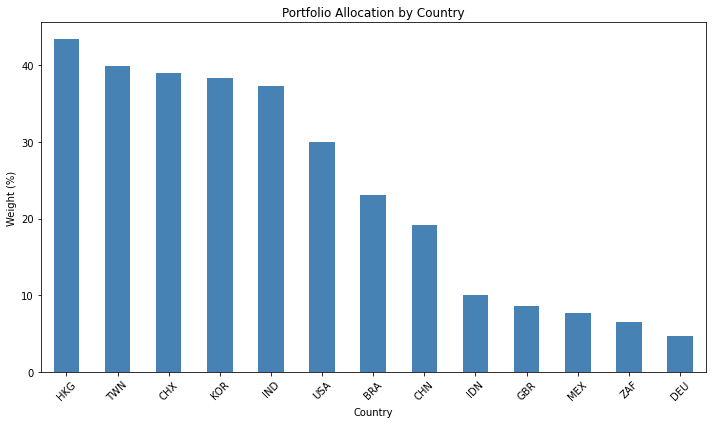

In [6]:
country_allocation = portfolio_assets.groupby('Country')['Weight (%)'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
country_allocation.plot(kind='bar', color='steelblue')
plt.title('Portfolio Allocation by Country')
plt.ylabel('Weight (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Risk Contribution Breakdown

# Top 1000

Text(0.5, 0, 'Risk Contribution (%)')

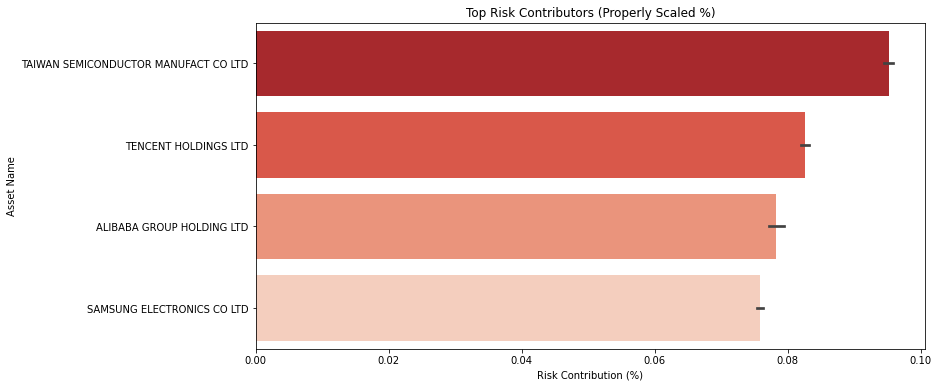

In [7]:


top_risk = df.nlargest(1000, '%Contribution to Total Risk')

plt.figure(figsize=(12,6))
sns.barplot(y='Asset Name', x='%Contribution to Total Risk', 
            data=top_risk, palette='Reds_r')
plt.title('Top Risk Contributors (Properly Scaled %)')
plt.xlabel('Risk Contribution (%)')

# Top 2000

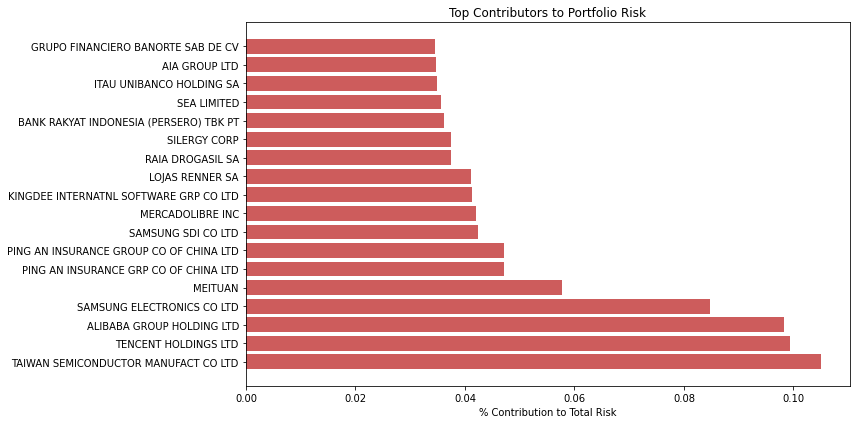

In [8]:
# Top contributors to total risk
top_risk_contributors = portfolio_assets.sort_values('%Contribution to Total Risk', ascending=False).head(2000)

plt.figure(figsize=(12,6))
plt.barh(top_risk_contributors['Asset Name'], top_risk_contributors['%Contribution to Total Risk'], color='indianred')
plt.title('Top Contributors to Portfolio Risk')
plt.xlabel('% Contribution to Total Risk')
plt.tight_layout()
plt.show()

# Risk vs. Weight Scatterplot

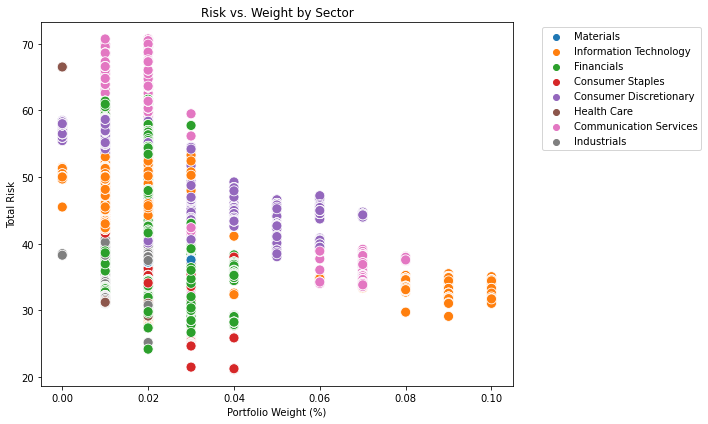

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=portfolio_assets, x='Weight (%)', y='Total Risk', hue='GICS_sector', s=100)
plt.title('Risk vs. Weight by Sector')
plt.xlabel('Portfolio Weight (%)')
plt.ylabel('Total Risk')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Performance Metrics Analysis

# Active Weight vs. Tracking Error Contribution

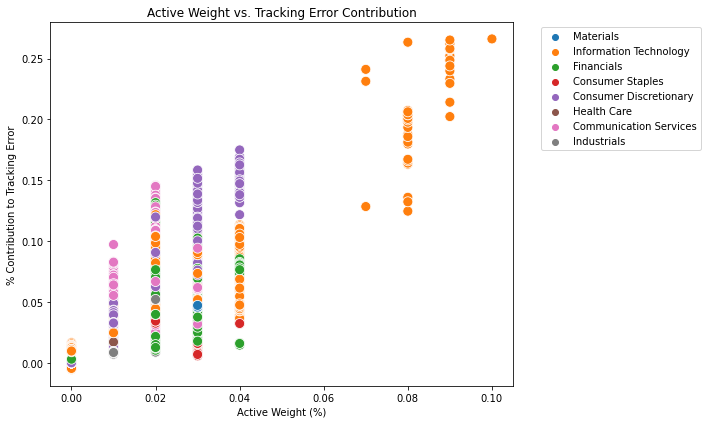

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=portfolio_assets, x='Active Weight (%)', y='%Contribution to Tracking Error', hue='GICS_sector', s=100)
plt.title('Active Weight vs. Tracking Error Contribution')
plt.xlabel('Active Weight (%)')
plt.ylabel('% Contribution to Tracking Error')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ESG Scores by Sector

In [11]:
# Check number of missing values per column
missing_summary = portfolio_assets[['Price(USD)', 
                                    'Overall ESG Score', 
                                    'Overall ESG Environmental Score', 
                                    'Overall ESG Social Score', 
                                    'Overall ESG Governance Score']].isna().sum()

print("Missing Values:\n", missing_summary)

Missing Values:
 Price(USD)                           0
Overall ESG Score                  970
Overall ESG Environmental Score    970
Overall ESG Social Score           970
Overall ESG Governance Score       970
dtype: int64


In [12]:
# Impute missing ESG values using the sector mean
esg_cols = ['Overall ESG Score', 
            'Overall ESG Environmental Score', 
            'Overall ESG Social Score', 
            'Overall ESG Governance Score']

for col in esg_cols:
    portfolio_assets[col] = portfolio_assets.groupby('GICS_sector')[col].transform(lambda x: x.fillna(x.mean()))


<ipython-input-12-11cbaa1d7055>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio_assets[col] = portfolio_assets.groupby('GICS_sector')[col].transform(lambda x: x.fillna(x.mean()))
<ipython-input-12-11cbaa1d7055>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio_assets[col] = portfolio_assets.groupby('GICS_sector')[col].transform(lambda x: x.fillna(x.mean()))
<ipython-input-12-11cbaa1d7055>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [13]:
# Check number of missing values per column
missing_summary = portfolio_assets[['Price(USD)', 
                                    'Overall ESG Score', 
                                    'Overall ESG Environmental Score', 
                                    'Overall ESG Social Score', 
                                    'Overall ESG Governance Score']].isna().sum()

print("Missing Values:\n", missing_summary)

Missing Values:
 Price(USD)                         0
Overall ESG Score                  0
Overall ESG Environmental Score    0
Overall ESG Social Score           0
Overall ESG Governance Score       0
dtype: int64


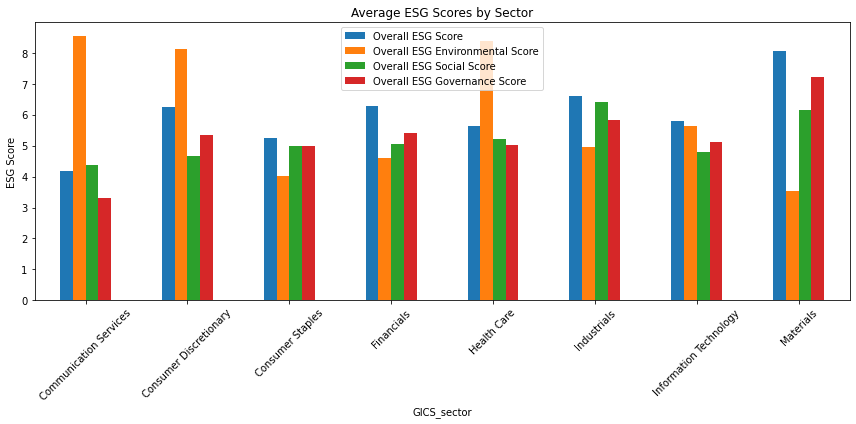

In [14]:
esg_scores = portfolio_assets.groupby('GICS_sector')[['Overall ESG Score', 
                                                     'Overall ESG Environmental Score',
                                                     'Overall ESG Social Score',
                                                     'Overall ESG Governance Score']].mean()

esg_scores.plot(kind='bar', figsize=(12,6))
plt.title('Average ESG Scores by Sector')
plt.ylabel('ESG Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyzing and Visualizing ESG Efficiency by Sector

##  integrate ESG factors intelligently by considering both sustainability and associated risk

In [15]:
# Drop missing values to avoid distortion
filtered_assets = portfolio_assets.dropna(subset=['Overall ESG Score', 'Price(USD)', 'Total Risk'])

# Calculate ESG Score and Price as proxy return per sector
esg_by_sector = filtered_assets.groupby('GICS_sector').agg({
    'Overall ESG Score': 'mean',
    'Price(USD)': 'mean',
    'Total Risk': 'mean'
}).reset_index()

# Compute risk-adjusted ESG score (optional)
esg_by_sector['ESG_to_Risk'] = esg_by_sector['Overall ESG Score'] / esg_by_sector['Total Risk']

# Sort to favor sectors with high ESG scores and reasonable risk
esg_by_sector_sorted = esg_by_sector.sort_values(by='ESG_to_Risk', ascending=False)

# Display top ESG-friendly sectors
print(esg_by_sector_sorted[['GICS_sector', 'Overall ESG Score', 'Total Risk', 'ESG_to_Risk']])


              GICS_sector  Overall ESG Score  Total Risk  ESG_to_Risk
7               Materials           8.073802   38.368122     0.210430
5             Industrials           6.612420   34.879736     0.189578
3              Financials           6.281725   37.663500     0.166785
2        Consumer Staples           5.239668   34.519803     0.151787
6  Information Technology           5.793408   43.404444     0.133475
1  Consumer Discretionary           6.234379   49.193320     0.126732
4             Health Care           5.633333   52.703587     0.106887
0  Communication Services           4.177326   48.260467     0.086558


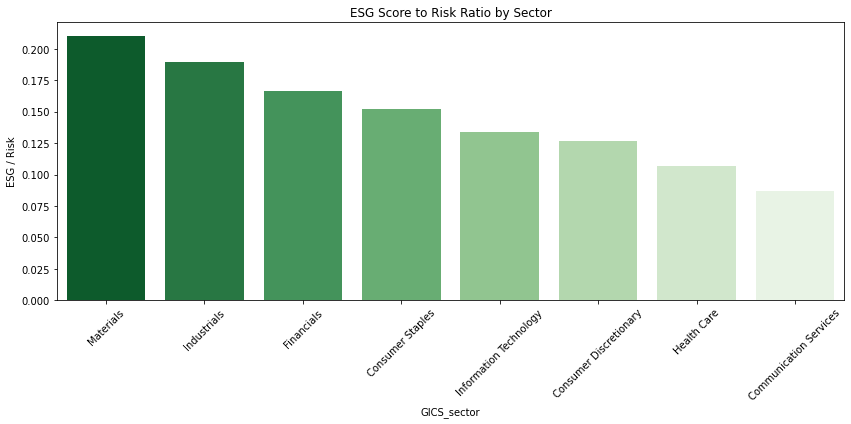

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(data=esg_by_sector_sorted, x='GICS_sector', y='ESG_to_Risk', palette='Greens_r')
plt.title('ESG Score to Risk Ratio by Sector')
plt.ylabel('ESG / Risk')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ESG vs. Risk

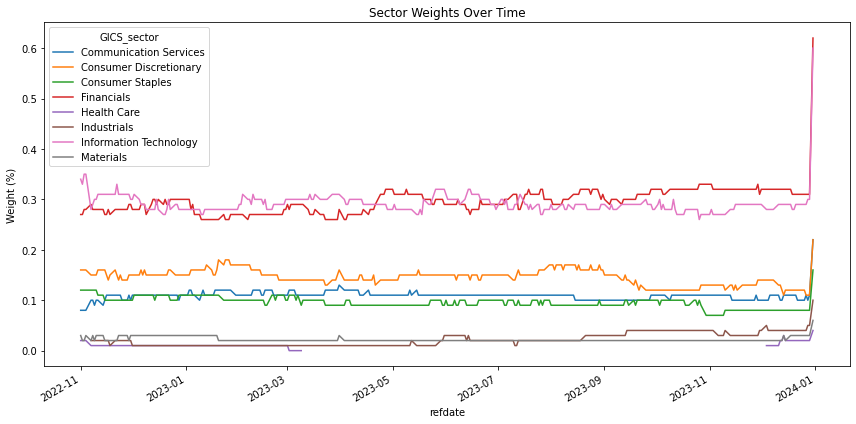

In [17]:
# Example for full dataset
if len(df['refdate'].unique()) > 1:
    time_series = df.groupby(['refdate', 'GICS_sector'])['Weight (%)'].sum().unstack()
    time_series.plot(figsize=(12,6))
    plt.title('Sector Weights Over Time')
    plt.ylabel('Weight (%)')
    plt.tight_layout()
    plt.show()

# Sector Concentration Index (HHI) and ESG Score Risk Correlation Analysis

In [18]:
# Herfindahl-Hirschman Index
hhi = (portfolio_assets.groupby('GICS_sector')['Weight (%)']
       .sum().pow(2).sum())
print(f"Sector Concentration HHI: {hhi:.0f} (Higher = More Concentrated)")

Sector Concentration HHI: 21031 (Higher = More Concentrated)


Text(0.5, 1.0, 'ESG Scores vs. Portfolio Risk')

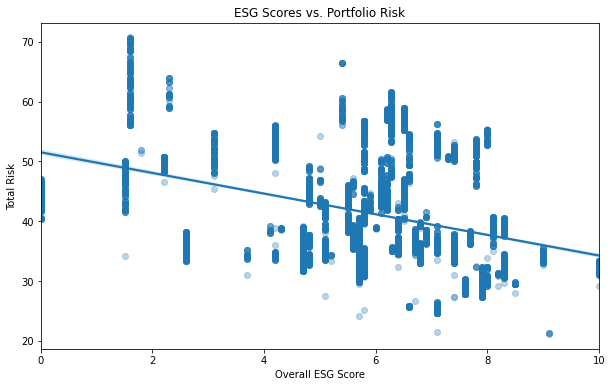

In [19]:
plt.figure(figsize=(10,6))
sns.regplot(x='Overall ESG Score', y='Total Risk', 
            data=portfolio_assets, scatter_kws={'alpha':0.3})
plt.title('ESG Scores vs. Portfolio Risk')

# Monitor Tracking Error: 30-Day Rolling Tracking Error

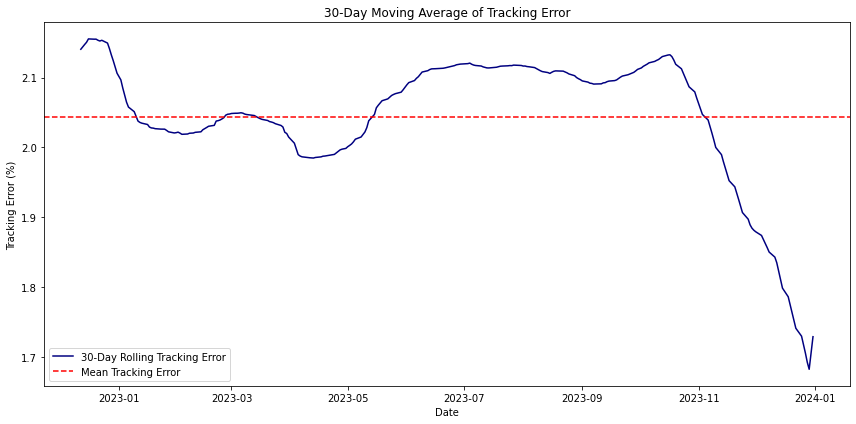

In [20]:
# Calculate total tracking error per day
tracking_error_daily = df.groupby('refdate')['%Contribution to Tracking Error'].sum().sort_index()

# Compute rolling average (30-day window)
rolling_te = tracking_error_daily.rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(rolling_te, label='30-Day Rolling Tracking Error', color='navy')
plt.axhline(rolling_te.mean(), color='red', linestyle='--', label='Mean Tracking Error')
plt.title('30-Day Moving Average of Tracking Error')
plt.xlabel('Date')
plt.ylabel('Tracking Error (%)')
plt.legend()
plt.tight_layout()
plt.show()


# Flag Periods of Elevated Tracking Error

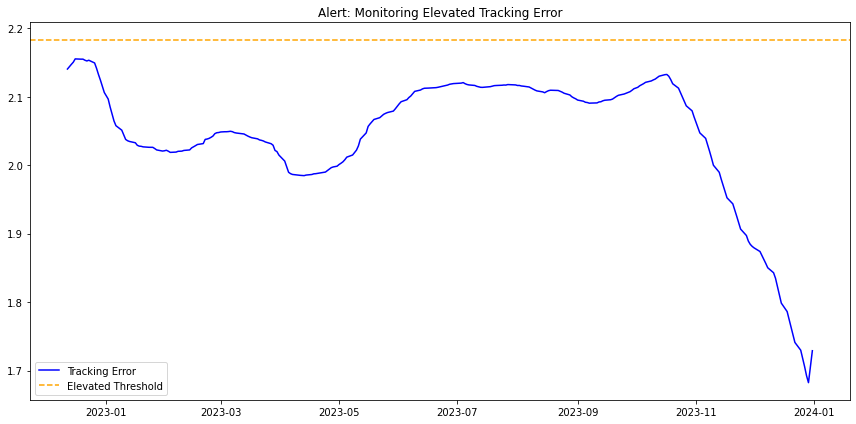

In [21]:
# Define upper bound (e.g., 1.5x standard deviation)
threshold = rolling_te.mean() + 1.5 * rolling_te.std()

plt.figure(figsize=(12,6))
plt.plot(rolling_te, label='Tracking Error', color='blue')
plt.axhline(threshold, color='orange', linestyle='--', label='Elevated Threshold')
plt.title('Alert: Monitoring Elevated Tracking Error')
plt.legend()
plt.tight_layout()
plt.show()
